In [1]:
import random
import pennylane as qml
import jax
from jax import numpy as jnp
import numpy as np
from templates.layers.naive_strong_entangler import StronglyEntanglingLayers

In [37]:
num_qubits = 3
num_layers = 3
dev = qml.device('default.mixed', wires=num_qubits)

@qml.qnode(dev, interface="jax")
def circuit(x, weights, p=None):
    qml.AmplitudeEmbedding(features=x, wires=range(num_qubits), normalize=True, pad_with=True)
    qml.StronglyEntanglingLayers(weights=weights, wires=range(num_qubits))
    #StronglyEntanglingLayers(weights=weights, wires=range(num_qubits))

    return qml.expval(qml.PauliZ(wires=1))

In [38]:
x = np.array([1, 2])
weight_shape = StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
np.random.seed(42)
weights =  weights = np.random.random(size=weight_shape)
p = 0
print(qml.draw(circuit, decimals=2, max_length=1000, expansion_strategy="device")(x, weights, p))

0: ─╭QubitStateVector(M0)──Rot(0.37,0.95,0.73)─╭●────╭X──Rot(0.71,0.02,0.97)─╭●─╭X──Rot(0.43,0.29,0.61)──────────────────────╭●────╭X─┤     
1: ─├QubitStateVector(M0)──Rot(0.60,0.16,0.16)─╰X─╭●─│───Rot(0.83,0.21,0.18)─│──╰●─╭X────────────────────Rot(0.14,0.29,0.37)─╰X─╭●─│──┤  <Z>
2: ─╰QubitStateVector(M0)──Rot(0.06,0.87,0.60)────╰X─╰●──Rot(0.18,0.30,0.52)─╰X────╰●────────────────────Rot(0.46,0.79,0.20)────╰X─╰●─┤     


In [2]:
num_qubits = 3
num_layers = 3
dev = qml.device('default.mixed', wires=num_qubits)

@qml.qnode(dev, interface="jax")
def circuit(x, weights, p=None):
    qml.AmplitudeEmbedding(features=x, wires=range(num_qubits), normalize=True, pad_with=True)
    #qml.StronglyEntanglingLayers(weights=weights, wires=range(num_qubits))
    StronglyEntanglingLayers(weights=weights, wires=range(num_qubits), p=p)

    return qml.expval(qml.PauliZ(wires=1))

np.random.seed(42)
x = np.array([1, 2])
weight_shape = StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
weights =  weights = np.random.random(size=weight_shape)
p = [0.1, 0.2, 0.3]
print(qml.draw(circuit, decimals=2, max_length=1000, expansion_strategy="device")(x, weights, p))

ranges = [1, 2, 1]
p = [0.1 0.2 0.3]
0: ─╭QubitStateVector(M0)──Rot(0.37,0.95,0.73)──DepolarizingChannel(0.10)─╭●──DepolarizingChannel(0.10)───────────────────────────────╭X──DepolarizingChannel(0.10)──Rot(0.71,0.02,0.97)────────DepolarizingChannel(0.10)─╭●──DepolarizingChannel(0.10)─╭X──DepolarizingChannel(0.10)──Rot(0.43,0.29,0.61)──DepolarizingChannel(0.10)─────────────────────────────────────────────────╭●──DepolarizingChannel(0.10)───────────────────────────────╭X──DepolarizingChannel(0.10)─┤     
1: ─├QubitStateVector(M0)──Rot(0.60,0.16,0.16)──DepolarizingChannel(0.20)─╰X──DepolarizingChannel(0.20)─╭●──DepolarizingChannel(0.20)─│───Rot(0.83,0.21,0.18)────────DepolarizingChannel(0.20)────────────────────────────│─────────────────────────────╰●──DepolarizingChannel(0.20)─╭X────────────────────DepolarizingChannel(0.20)──Rot(0.14,0.29,0.37)──DepolarizingChannel(0.20)─╰X──DepolarizingChannel(0.20)─╭●──DepolarizingChannel(0.20)─│─────────────────────────────┤  <Z>
2: ─╰QubitStateVector

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
torch.Size([32])


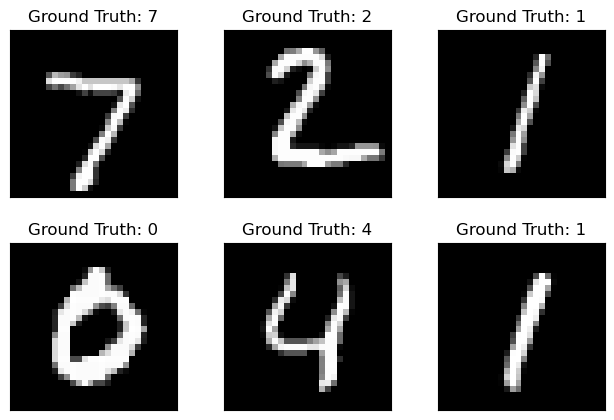

In [2]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

batch_size = 32
# 读取测试数据，train=True读取训练数据；train=False读取测试数据
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf)
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

examples = enumerate(test_loader) #img&label
batch_idx, (imgs, labels) = next(examples) #读取数据,batch_idx从0开始

print(labels) #读取标签数据
print(labels.shape) #torch.Size([32])，因为batch_size为32

#-------------------------------数据显示--------------------------------------------
#显示6张图片
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(imgs[i][0], cmap='gray', interpolation='none')#子显示
  plt.title("Ground Truth: {}".format(labels[i])) #显示title
  plt.xticks([])
  plt.yticks([])

plt.show()


In [4]:
import cv2
print(cv2.__version__)

4.7.0


In [33]:
import torch
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt

# 定义转换
transform = transforms.Compose([transforms.ToTensor()])

# 加载训练集
trainset = datasets.MNIST('./data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False)

# 加载测试集
testset = datasets.MNIST('./data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

print(len(trainloader))
print(len(testloader))

size = 8
count = 0
for i in range(len(testset)):
    img, label = testset[i]
    if label == 1:
        img_resized = cv2.resize(img.squeeze().numpy(), (size, size), interpolation=cv2.INTER_AREA)
        #img_resized = cv2.resize(img.squeeze().numpy(), (8, 8))
        #plt.imshow(img_resized, cmap='gray')
        plt.imsave(f'data/mnist/size_{size}/test/{label}/{count}.png', img_resized, cmap='gray')
        #plt.imshow(img.squeeze().numpy(), cmap='gray')
        count = count + 1
        
        
print(count)

60000
10000
1135


[-1 -1]
[[  0   0   0   0   0   0   0   0   0   0   0  69 179  73   0   0   0   0
   83 162 123 255   0   0   0   0 197  32  30 246   0   0   0   0 247   0
   17 235   0   0   0   0 227   7  83 217   0   0   0   0 156 253 209  23
    0   0   0   0   3  31   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1  22 188   0   0   0   0
   80 220 173 195  10   0   0  34 255  39   3 161  73   0   0  97 166   0
    0 124  88   0   0  69 210   4  22 232  27   0   0   0 110 205 170  47
    0   0   0   0   0   0   0   0   0   0]]
[-1 -1]
[-1 -1]
[-1 -1]
[-1  1]
[1 1]
[1 1]
[1 1]
[1 1]


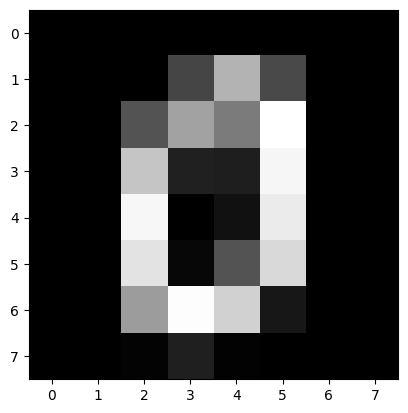

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import numpy
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, size=10):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # 遍历文件夹，收集图片路径和标签
        for label in [0, 1]:
            label_dir = os.path.join(root_dir, f"{label}")
            count = 0
            for filename in os.listdir(label_dir):
                count = count + 1
                if count < size:
                    self.image_paths.append(os.path.join(label_dir, filename))
                    self.labels.append(-1 if label == 0 else 1)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        #image = Image.open(image_path).convert("RGB")
        image = Image.open(image_path).convert("L")
        
        if self.transform:
            image = self.transform(image)

        image_array = numpy.array(image).flatten()
        
        return image_array, label

def collate_fn(batch):
    images = []
    labels = []
    
    for image, label in batch:
        images.append(image)
        labels.append(label)
    
    return numpy.array(images), numpy.array(labels)

transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 标准化和归一化
])
transform = None

test_dataset = CustomDataset(root_dir='./data/mnist/size_8/test/', transform=transform)

test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

flag = 0
for images, labels in test_dataloader:
    # 在此处执行您的训练逻辑
    print(f"{labels}")
    if flag == 0:
        flag = 1
        print(f"{images}")
        plt.imshow(numpy.array(images[0]).reshape(-1, 8), cmap='gray')
    #print(f"{images}")


